<a href="https://colab.research.google.com/github/laiba-bajwa/ModelForge/blob/main/multiclass_classifier_accuracy_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Multi-Class Sentiment Classification - Customized for YOUR Data
# Your data has 'text' and 'multiclass' columns (not 'sentiment')

import pandas as pd           # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns        # For statistical data visualization
import re                    # For regular expressions (text processing)
import string               # For string operations (punctuation removal)
import math                 # For mathematical operations
import time                 # For timing model training

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
#Logistic Regression ek model hai jo kisi cheez ko do categories (jaise "yes" ya "no") mein classify karta hai
from sklearn.model_selection import train_test_split
from sklearn import metrics

# NLTK libraries for natural language processing
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer

print("✅ All libraries imported successfully!")
print("📊 Ready to analyze YOUR custom data with 'multiclass' column")

✅ All libraries imported successfully!
📊 Ready to analyze YOUR custom data with 'multiclass' column


In [ ]:
# Download necessary NLTK resources for text processing
print("📥 Downloading NLTK resources...")
print("These are needed for text cleaning and preprocessing")

nltk.download('wordnet', quiet=True)      # For word lemmatization
nltk.download('omw-1.4', quiet=True)      # Open Multilingual Wordnet
nltk.download('punkt', quiet=True)        # For sentence tokenization
nltk.download('stopwords', quiet=True)    # For removing common words
nltk.download('averaged_perceptron_tagger', quiet=True)  # For POS tagging
nltk.download('tagsets_json', quiet=True) # For tagset information

# Set up plotting style for better visualizations
plt.style.use("default")
sns.set_style("whitegrid")

print("✅ NLTK resources downloaded successfully!")
print("🎨 Plotting style configured for clear visualizations")
print("🚀 Setup completed - ready to process YOUR data!")# Download necessary NLTK resources for text processing
# These resources are needed for tokenization, stopwords, and lemmatization

📥 Downloading NLTK resources...
These are needed for text cleaning and preprocessing
✅ NLTK resources downloaded successfully!
🎨 Plotting style configured for clear visualizations
🚀 Setup completed - ready to process YOUR data!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving en_train.csv to en_train.csv


In [ ]:
df_train = pd.read_csv("en_train.csv")
print(df_train.head())


                                                text    binary  \
0  #USER# #USER# #USER# #USER# You expect a man t...  Not Hope   
1  #USER# #USER# #USER# #USER# Tinubu is actually...  Not Hope   
2  it'd be nice if missguided actually had stock ...      Hope   
3  #USER# Anyway love u bubbly i know i can count...      Hope   
4  “you have a lot of people rooting for you whet...  Not Hope   

         multiclass  
0          Not Hope  
1          Not Hope  
2           Sarcasm  
3  Generalized Hope  
4          Not Hope  


In [ ]:
def pre_process(tweet):
    if not isinstance(tweet, str):
        return ""

    tweet = tweet.lower()

    STOPWORDS = stopwords.words("english") + [
        'u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'  # Social media specific
    ]


    # Remove extra whitespace

    nopunc = ''.join([char for char in tweet if char not in string.punctuation])  # Changed 'text' to 'tweet'
    words = [word for word in nopunc.split() if word.lower() not in STOPWORDS]  # Changed 'STOPWORD' to 'STOPWORDS' and 'word' to 'words'

      # Optional: Lemmatization (uncomment if you want to use it)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]


    return ' '.join(words)  # Changed 'word' to 'words'

In [ ]:
df_train['clean_tweets'] = df_train['text'].apply(pre_process)

In [ ]:
print(df_train.columns.tolist())

['text', 'binary', 'multiclass', 'clean_tweets']


In [ ]:
  # Create multi-class mapping
multiclass_mapping = {
        'Not Hope': 0,          # Negative sentiment = 0
        'Generalized Hope': 1,   # Neutral sentiment = 1
        'Sarcasm': 2            # Positive sentiment = 2
    }

In [ ]:

# Filter the dataset to keep only the rows where the sentiment is 'negative' or 'positive'
df_train = df_train[df_train['multiclass'].isin(multiclass_mapping.keys())].copy()

# Map the sentiment labels to numeric values (negative -> 0, positive -> 1)
df_train['new_multiclass'] = df_train['multiclass'].map(multiclass_mapping)

# Check the result
print(df_train[['text', 'new_multiclass']].head(10))

                                                 text  new_multiclass
0   #USER# #USER# #USER# #USER# You expect a man t...               0
1   #USER# #USER# #USER# #USER# Tinubu is actually...               0
2   it'd be nice if missguided actually had stock ...               2
3   #USER# Anyway love u bubbly i know i can count...               1
4   “you have a lot of people rooting for you whet...               0
5   Hoping to get on the brown a lot more after I ...               0
6   #USER# no exactly :/ and like i’ve seen (non g...               0
7   #USER# You have lost because your so called cu...               0
9   #USER# #USER# My dear Rwandans still remember ...               0
10  Well the club season is over.  \nWe ended up t...               1


In [ ]:
train_vocab = set(" ".join(df_train["clean_tweets"]).split())
print(f"Train unique words : {len(train_vocab):,}")

Train unique words : 15,344


In [ ]:
print("sample train words ->",sorted(list(train_vocab))[:10])

sample train words -> ['0', '00', '0000', '000268958', '005', '007', '00700', '01', '010', '015']


In [ ]:
x = df_train["clean_tweets"]
y = df_train["multiclass"]
print(x.shape,y.shape)

(4221,) (4221,)


In [ ]:
# here we training data start
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2 ,random_state=42, stratify=  y)

In [ ]:
vecterizer = CountVectorizer(binary = True)
x_train_data = vecterizer.fit_transform(x_train)
x_test_data = vecterizer.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB
start_time = time.time()
nb = MultinomialNB()
# hare we are doing training
# we give tata with lable
nb.fit(x_train_data,y_train)
end_time = time.time()
print("\nTraining Time: {:.3f} seconds".format(end_time - start_time))


Training Time: 0.026 seconds


In [ ]:
# here we just give data and predict what will the lable
x_test_predict_data = nb.predict(x_test_data)

# -> below line this code will print on screen

# x_test_predict_data


In [ ]:
# now we predict the data and his lable
# now we check eccuracey which predict lable
from sklearn import metrics

print("\n=======Accuracy Score===========")
acc = metrics.accuracy_score(y_test, x_test_predict_data)
print(f"Accuracy Score : {acc*100:.2f}%")


=======Accuracy Score===========
Accuracy Score : 72.54%


In [ ]:

# Print the confusion matrix

print("\n=======Confusion Matrix===========")
print(metrics.confusion_matrix(y_test , x_test_predict_data))



=======Confusion Matrix===========
[[158  99   0]
 [ 43 405   1]
 [ 12  77  50]]


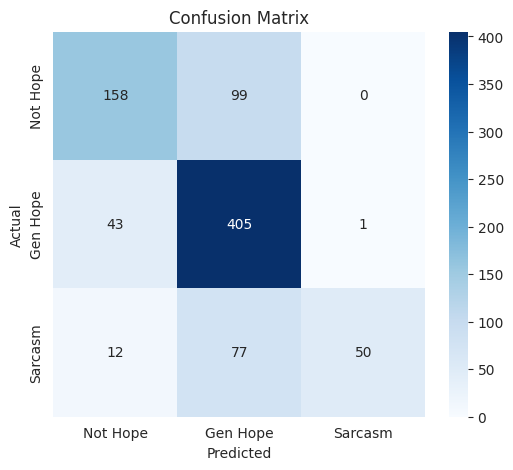

In [ ]:
from sklearn.metrics import confusion_matrix
# Scikit-learn ke andar metrics module ko import kar rahe ho
# —> jisme sab evaluation tools hote hain (accuracy, confusion matrix, report etc.)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, x_test_predict_data)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hope', 'Gen Hope', 'Sarcasm'], yticklabels=['Not Hope', 'Gen Hope', 'Sarcasm'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_features = 20000,#yeh word consider kia jaye gy
    ngram_range = (1,2),#words combination
    min_df = 2,#2 dataset frequcy 2 sy kam hai ,ignore
    max_df = 0.95#95% sy zada hai tu ignore common words

)


In [ ]:
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf= vectorizer.transform(x_train) # -> why we are giving or passing  x_train data which (80%) why we are not giving x_train_data
# we are using x_train data bcs aghr hum already train vocab dataki tfidf kryn gy tu ya galt ho ga is lia hum nay actual data jo 80% use kr rhy hn us ko use kr rhy hai

print("\nTF-IDF Vectorizer vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Sample features:", vectorizer.get_feature_names_out()[:5])


TF-IDF Vectorizer vocabulary size: 8053
Sample features: ['007' '010' '0625' '06272022' '06272022 total']
